<a href="https://colab.research.google.com/github/rajeshmore1/DataScience_Mentorship/blob/main/NLP_2_Natural_Language_Processing_Basics_(Feature_Extraction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents
1. Feature Extraction
2. Bag of Word model
3. Concept of n-grams
4. Count Vectorizer method
5. TF-IDF
6. Word Embedding with python code

# Why do we need feature extraction?
Feature Engineering is a very key part of Natural Language Processing. as we all know algorithms and machines can’t understand characters or words or sentences hence we need to encode these words into some specific form of numerical in order to interact with algorithms or machines. we can’t feed the text data containing words /sentences/characters to a machine learning model.

There are various ways to perform feature extraction. some popular and mostly used are:-

1. Bag of Words model
2. TF-IDF

## 1. Bag of Words(BOW) model
It’s the simplest model, Image a sentence as a bag of words here The idea is to take the whole text data and count their frequency of occurrence. and map the words with their frequency. This method doesn’t care about the order of the words, but it does care how many times a word occurs and the default bag of words model treats all words equally.

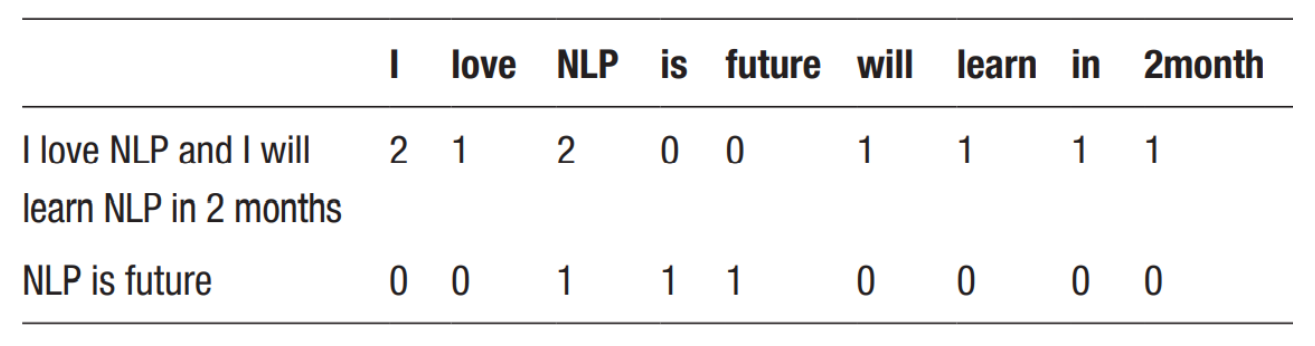

The feature vector will have the same word length. Words that come multiple times get higher weightage making this model biased, which has been fixed with TF-IDF discussed further.

Implementation of BOW model using Python:

sklearn provides all the necessary feature extraction techniques with easy implementation.

In [1]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [3]:
# Importing CountVectorizer in order to implement the Bag of words model.
import pandas as pd
text = ["i love NLP",
        "NLP is future",
        "i will learn in 2 months"]
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names())
print(df)

   future  in  is  learn  love  months  nlp  will
0       0   0   0      0     1       0    1     0
1       1   0   1      0     0       0    1     0
2       0   1   0      1     0       1    0     1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


* The method fit_transform()first fits the data to countVectorizer and then converts it into features
* The method get_features_name() returns the vocabulary of unique words.
* Once countVectorizer has fitted it would not update the Bag of words.
* Stopwords we can pass a list of stopwords or specify language name ie {‘english’}to exclude stopwords from the vocabulary.
After fitting the countVectorizer we can transform any text into the fitted vocabulary.

In [4]:
text2 = ['I love NLP but can not learn in 2 months']
vectorizer.transform(text2).toarray()

array([[0, 1, 0, 1, 1, 1, 1, 0]])

In the above example of the BOW model, each word is considered as one feature but there are some problems with this model.

For example: assume that we have the word “not bad” and if we split this into “not” and “bad” then it will lose out its meaning. “not bad” is similar to “good” to some extent. we don’t want to split such words which lose their meaning after splitting. here the idea of n-grams comes into the picture.

* Unigrams are the single unique words in a sentence
* Bigrams are the combination of 2 words ie “not bad”,” turn off”.
* Trigrams are the combination of 3 words.

While implementing the BOW model using CounVectorizer we can include n-grams in vocabulary using ngram_range parameter.

Implementation of the BOW model with n-gram:

* ngram_range =(1, 1) means only unigrams,

* ngram_range = (1, 2) means unigrams with bigrams

* ngram_range=(2, 2) means only bigrams.

In [5]:
text = ["food was not bad"]
vectorizer = CountVectorizer(ngram_range = (1,2))
count_matrix = vectorizer.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names())
print(df)

   bad  food  food was  not  not bad  was  was not
0    1     1         1    1        1    1        1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


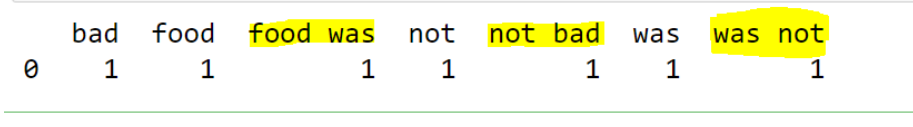

## 2. TF-IDF (Term frequency-inverse Document Frequency)
The BOW model doesn’t give good results since it has a drawback. Assume that there is a particular word that is appearing in all the documents and it comes multiple times, eventually, it will have a higher frequency of occurrence and it will have a greater value that will cause a specific word to have more weightage in a sentence, that’s not good for our analysis.

The idea of TF-IDF is to reflect the importance of a word to its document or sentence by normalizing the words which occur frequently in the collection of documents.

**Term frequency (TF):** number of times a term has appeared in a document.

The term frequency is a measure of how frequently or how common a word is for a given sentence.

**Inverse Document Frequency (IDF):**

The inverse document frequency (IDF ) is a measure of how rare a word is in a document. Words like “the”,” a” show up in all the documents but rare words will not occur in all the documents of the corpus.

If a word appears in almost every document means it’s not significant for the classification.

IDF of a word is = log(N/n)

N: total number of documents.

n: number of documents containing a term (word)

TF-IDF Evaluates how relevant is a word to its sentence in a collection of sentences or documents.

TF-IDF Evaluates how relevant is a word to its sentence in a collection of sentences or documents.

Implementing TF-IDF with python:

With Tfidftransformer you will compute word counts using CountVectorizer and then compute the IDF values and only then compute the Tf-IDF scores. With Tfidfvectorizer we do all calculations in one step.

sklearn provides 2 classes for implementing TF-IDF:

* Tfidftransformer:  where we need to compute word counts then compute IDF values and then compute the TF-IDF scores.
* Tfidfvectorizer: here all the steps are done in a single step.

Importing libraries :

In [6]:
import sklearn
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

Implementation :



In [7]:
text = ["i love the NLP",
        "NLP is the future",
        "i will learn the NLP"]
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(text)
count_array = matrix.toarray()
df = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names())
print(df)

     future        is     learn      love       nlp       the      will
0  0.000000  0.000000  0.000000  0.767495  0.453295  0.453295  0.000000
1  0.608845  0.608845  0.000000  0.000000  0.359594  0.359594  0.000000
2  0.000000  0.000000  0.608845  0.000000  0.359594  0.359594  0.608845


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


“NLP”, ”the” came in all the three documents hence it has a smaller vector value. ”love” has a higher vector value since it appeared only once in a document.

## 3. Word Embedding
Imagine I have 2 words “love” and “like”, these two words have almost similar meanings but according to TF-IDF and BOW model these two will have separate feature values and these 2 words will be treated completely different.

TF-IDF, BOW model completely depends on the frequency of occurrence, it doesn’t take the meaning of words into consideration, hence above-discussed techniques are failed to capture the context and meaning of sentences.

“I like you” and “I love you” will have completely different feature vectors according to TF-IDF and BOW model, but that’s not correct.

note: while working with some classification task we would have big raw data and if we keep considering every synonym as a different word it will generate humongous numbers of tokens and this will cause numbers of features to get out of control.

Word embedding is a feature learning technique where words are mapped to vectors using their contextual hierarchy. similar words will have identical feature vectors.

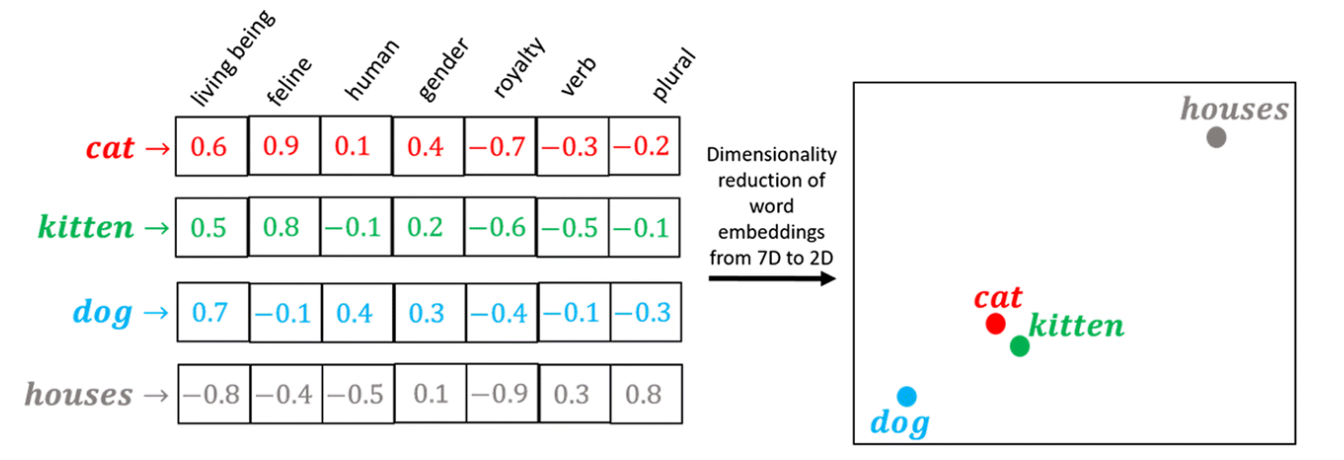

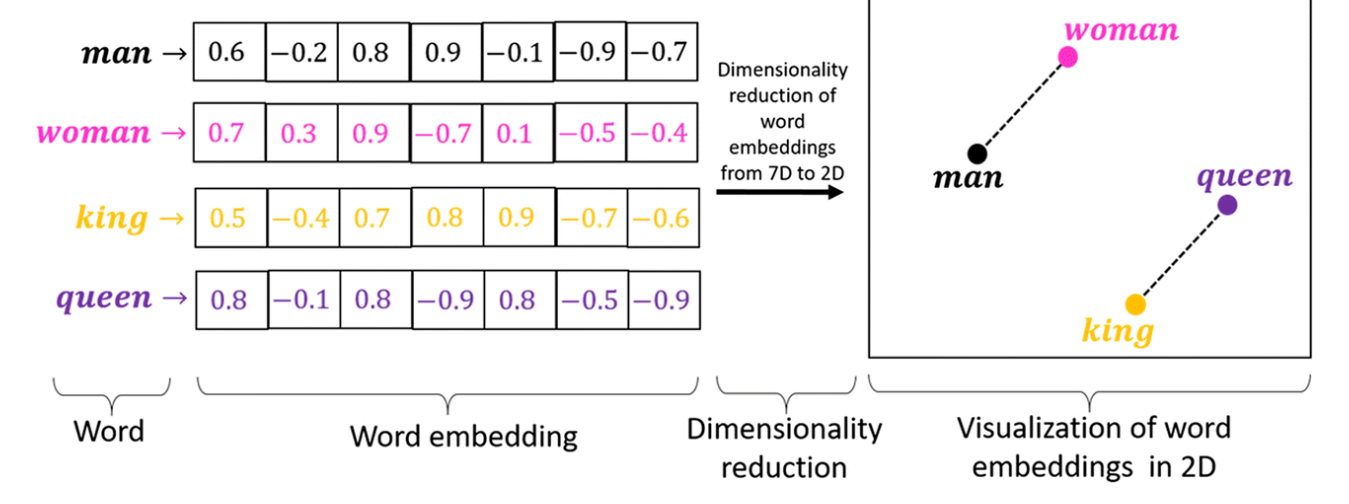

As you notice, cats and kitten are placed very closely since they are related.

word embedding is trained on more than 6 billion words using shallow neural networks.

word2vec has 2 algorithms

* CBOW
* Skip-Gram
don’t worry we don’t need to train word2vec, we will use pre-trained word vectors.

## Implementing word2vec using python:

A pre-trained word vector is a text file containing billions of words with their vectors. we only need to map words from our data with the words in the word vector in order to get the vectors.

download data from here:
https://www.kaggle.com/datasets/rtatman/glove-global-vectors-for-word-representation?select=glove.6B.50d.txt

Pre-trained word vector file come in (50,100,200,300) dimension. here dimension is the length of the vector of each word in vector space. more dimension means more information about that word but bigger dimension takes longer time for model training.

### 1. Loading glove word embedding of 100 dimensions into a dictionary:



In [8]:
import numpy as np
glove_vectors = dict()
file = open('/content/drive/MyDrive/Colab Notebooks/glove.6B.50d.txt', encoding = 'utf-8')
for line in file:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:])
    glove_vectors[word] = vectors
file.close()

The Python dictionary makes mapping easy hence loading into the dictionary is always preferable.

we can use the get() method to glove_vectors to get the vectors

In [9]:
glove_vectors.get('house')


array(['0.60137', '0.28521', '-0.032038', '-0.43026', '0.74806',
       '0.26223', '-0.97361', '0.078581', '-0.57588', '-1.188', '-1.8507',
       '-0.24887', '0.055549', '0.0086155', '0.067951', '0.40554',
       '-0.073998', '-0.21318', '0.37167', '-0.71791', '1.2234',
       '0.35546', '-0.41537', '-0.21931', '-0.39661', '-1.7831',
       '-0.41507', '0.29533', '-0.41254', '0.020096', '2.7425', '-0.9926',
       '-0.71033', '-0.46813', '0.28265', '-0.077639', '0.3041',
       '-0.06644', '0.3951', '-0.70747', '-0.38894', '0.23158',
       '-0.49508', '0.14612', '-0.02314', '0.56389', '-0.86188',
       '-1.0278', '0.039922', '0.20018'], dtype='<U9')

we divide the vectors by the number of words in that particular sentence/document for normalization purposes.